<a href="https://colab.research.google.com/github/lmeng/deep_learning_code/blob/master/CNN/mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

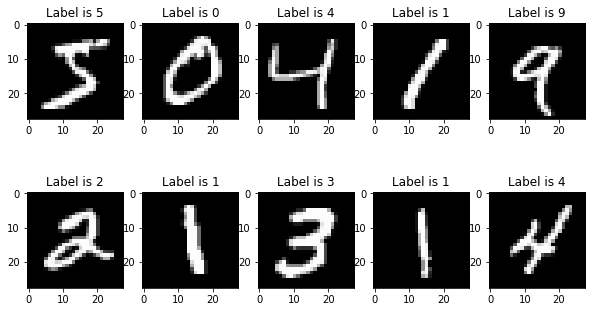

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,15))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.title('Label is {label}'.format(label=y_train[i]))
  plt.imshow(x_train[i], cmap='gray')
plt.show()

# Preprocess input

In [0]:
x_train2 = x_train.astype('float32')/255
y_train2 = y_train.astype('float32')
x_train2 = x_train2.reshape(x_train.shape[0], 28, 28, 1)

x_test2 = x_test.astype('float32')/255
y_test2 = y_test.astype('float32')
x_test2 = x_test2.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
y_train2.shape

(60000,)

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = tf.keras.Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(2,2),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model.fit(x_train2, y_train2, validation_data=(x_test2, y_test2), callbacks=[callbacks], epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 54s 900us/sample - loss: 0.1471 - acc: 0.9550 - val_loss: 0.0443 - val_acc: 0.9861
Epoch 2/10
60000/60000 [==============================] - 54s 906us/sample - loss: 0.0466 - acc: 0.9852 - val_loss: 0.0351 - val_acc: 0.9888
Epoch 3/10
60000/60000 [==============================] - 54s 899us/sample - loss: 0.0338 - acc: 0.9895 - val_loss: 0.0305 - val_acc: 0.9897
Epoch 4/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.0244 - acc: 0.9921
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 53s 886us/sample - loss: 0.0243 - acc: 0.9922 - val_loss: 0.0343 - val_acc: 0.9887


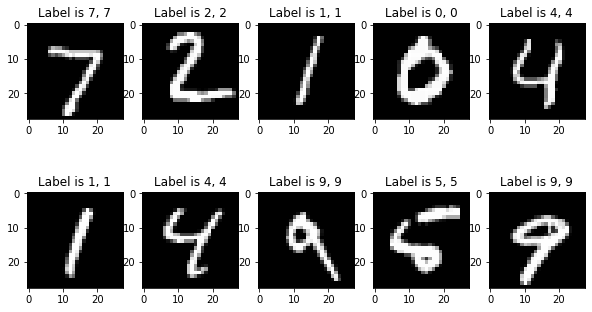

In [0]:
n = 10
plt.figure(figsize=(10,15))
for i in range(n):
  y_pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
  plt.subplot(5,5,i+1)
  plt.title('Label is {label}, {pred}'.format(label=y_test[i], pred=y_pred.argmax()))
  plt.imshow(x_test[i], cmap='gray')
plt.show()